Md Isahaq Ali 2017331065

In [28]:
%pylab
# Import functions and libraries
import numpy as np
import matplotlib.pyplot as plt
import threading,time
import sys

from numpy import pi
from numpy import sin
from numpy import zeros
from numpy import r_
from scipy import signal
from scipy import integrate

import threading,time
import multiprocessing

from numpy import mean
from numpy import power
from numpy.fft import fft
from numpy.fft import fftshift
from numpy.fft import ifft
from numpy.fft import ifftshift
from  scipy.io.wavfile import read as wavread


%matplotlib inline

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [29]:

def sg_plot( t_range, f_range, y, dbf = 60) :
    eps = 1e-3
    
    # find maximum
    y_max = abs(y).max()
    
    # compute 20*log magnitude, scaled to the max
    y_log = 20.0 * np.log10( abs( y ) / y_max + eps )
    
    fig=figure(figsize=(15,6))
    
    plt.imshow( np.flipud( 64.0*(y_log + dbf)/dbf ), extent= t_range  + f_range ,cmap=plt.cm.gray, aspect='auto')
    plt.xlabel('Time, s')
    plt.ylabel('Frequency, Hz')
    plt.tight_layout()


def myspectrogram_hann_ovlp(x, m, fs, fc,dbf = 60):
   
    isreal_bool = isreal(x).all()
    
    # pad x up to a multiple of m 
    lx = len(x);
    nt = (lx + m - 1) // m
    x = append(x,zeros(-lx+nt*m))
    x = x.reshape((m//2,nt*2), order='F')
    x = concatenate((x,x),axis=0)
    x = x.reshape((m*nt*2,1),order='F')
    x = x[r_[m//2:len(x),ones(m//2)*(len(x)-1)].astype(int)].reshape((m,nt*2),order='F')
    
    
    xmw = x * hanning(m)[:,None];
    
    
    # frequency index
    t_range = [0.0, lx / fs]
    
    if isreal_bool:
        f_range = [ fc, fs / 2.0 + fc]
        xmf = np.fft.fft(xmw,len(xmw),axis=0)
        sg_plot(t_range, f_range, xmf[0:m//2,:],dbf=dbf)
        print (1)
    else:
        f_range = [-fs / 2.0 + fc, fs / 2.0 + fc]
        xmf = np.fft.fftshift( np.fft.fft( xmw ,len(xmw),axis=0), axes=0 )
        sg_plot(t_range, f_range, xmf,dbf = dbf)
    
    return t_range, f_range, xmf
  
    
    
    isreal_bool = isreal(x).all()
    
    
    lx = len(x);
    nt = (lx + m - 1) // m
    x = append(x,zeros(-lx+nt*m))
    x = x.reshape((m/2,nt*2), order='F')
    x = concatenate((x,x),axis=0)
    x = x.reshape((m*nt*2,1),order='F')
    x = x[r_[m//2:len(x),ones(m//2)*(len(x)-1)].astype(int)].reshape((m,nt*2),order='F')
    
    
    xmw = x * hanning(m)[:,None];
    
    
  
    t_range = [0.0, lx / fs]
    
    if isreal_bool:
        f_range = [ fc, fs / 2.0 + fc]
        xmf = np.fft.fft(xmw,len(xmw),axis=0)
        sg_plot(t_range, f_range, xmf[0:m/2,:],dbf=dbf)
        print (1)
    else:
        f_range = [-fs / 2.0 + fc, fs / 2.0 + fc]
        xmf = np.fft.fftshift( np.fft.fft( xmw ,len(xmw),axis=0), axes=0 )
        sg_plot(t_range, f_range, xmf,dbf = dbf)
    
    return t_range, f_range, xmf

In [30]:
fs = 44100  # sampling rate
baud = 300  # symbol rate
Nbits = 10  # number of bits
Ns = int(fs/baud)
N = Nbits * Ns
f0 = 1800
bits = randn(Nbits,1) > 0

Text(0.5, 1.0, 'OOK signal of the sequence:[[1 0 0 0 1 0 1 0 1 0]]')

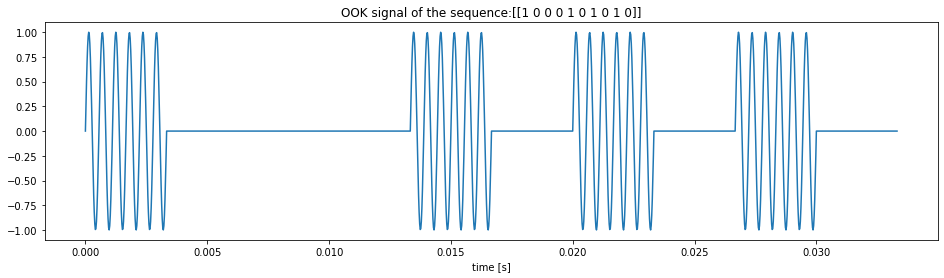

In [31]:
np.random.seed(seed=1)
bits = randn(Nbits,1) > 0
M = np.tile(bits,(1,Ns))
t = r_[0.0:N]/fs
OOK = M.ravel()*sin(2*pi*f0*t)

fig = figure(figsize = (16,4))
plot(t,OOK)
xlabel('time [s]')
title('OOK signal of the sequence:'+ np.array2string(transpose(np.uint8(bits))))

(0.0, 4096.0, 0.0, 294.0)

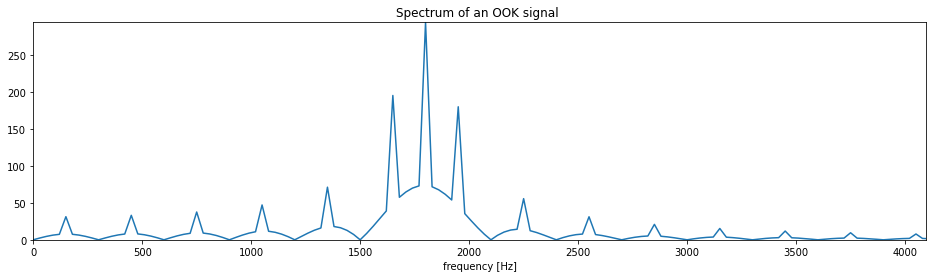

In [32]:
f = r_[0:N/2.0]/N*fs

OOK_f = (np.fft.fft(OOK))

fig = figure(figsize = (16,4))
plot(f,abs(OOK_f[:len(OOK_f)//2]))
xlabel('frequency [Hz]')
title('Spectrum of an OOK signal ')
axis((0,4096,0,max(abs(OOK_f))))

(0.0, 4096.0, 0.0, 1.9970256011631373)

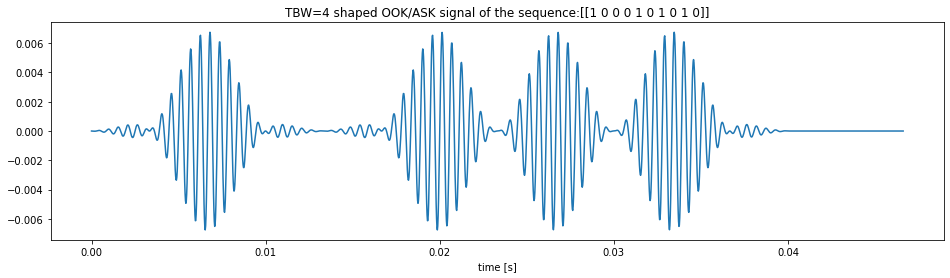

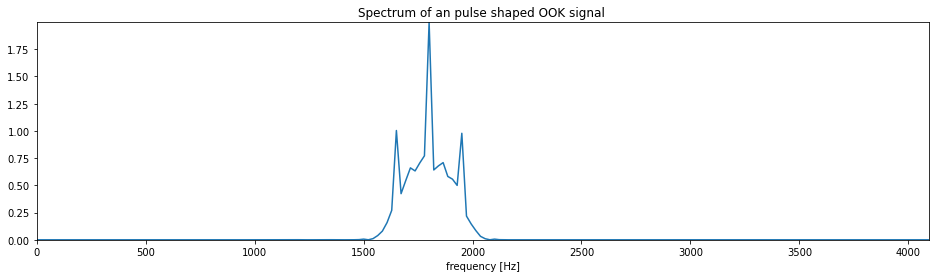

In [33]:
imp = zeros(N)
imp[::Ns] = bits.ravel()

h = signal.firwin(Ns*4,1.0/Ns)
imp_sinc = signal.fftconvolve(imp,h,mode='full')
t = r_[0.0:len(imp_sinc)]/fs
OOK_s = imp_sinc*sin(2*pi*f0*t)


fig = figure(figsize = (16,4))
plot(t,OOK_s)
xlabel('time [s]')
title('TBW=4 shaped OOK/ASK signal of the sequence:'+ np.array2string(transpose(np.uint8(bits))))

f = r_[0:len(imp_sinc)/2.0]/len(imp_sinc)*fs
OOK_sf = (np.fft.fft(OOK_s))

fig = figure(figsize = (16,4))
plot(f,abs(OOK_sf[0:len(OOK_sf)//2+1]))
xlabel('frequency [Hz]')
title('Spectrum of an pulse shaped OOK signal ')
axis((0,4096,0,max(abs(OOK_sf))))